<h1><center><font size="6">Data Cleaning, EDA, and Feature Engineering Notebook</font></center></h1>

# Contents

- <a href='#1'>Importing Packages</a>  
- <a href='#2'>Uploading Data</a>
- <a href='#3'>Creating Train, Validation, and Testing Sets</a>  
- <a href='#4'>Data Cleaning</a>  
- <a href='#5'>Exploratory Data Analysis</a>
- <a href='#6'>Feature Engineering</a>
- <a href='#7'>Post-Feature Selection</a> 

# <a id='1'>Importing Packages</a>

In [1]:
# Importing Packages
import numpy as np 
import pandas as pd
import re
import json
import requests
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
plt.style.use("fivethirtyeight")

from sklearn.model_selection import train_test_split
import pickle

# <a id='2'>Uploading Data</a>

In [2]:
df = pd.read_excel("../data/default of credit card clients.xls")
new_header = df.iloc[0]
df = df[1:] 
df.columns = new_header
df = df.rename(columns={"default payment next month": "default"}) 
df.head()

0 ID LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5 PAY_6  \
1  1     20000   2         2        1  24     2     2    -1    -1    -2    -2   
2  2    120000   2         2        2  26    -1     2     0     0     0     2   
3  3     90000   2         2        2  34     0     0     0     0     0     0   
4  4     50000   2         2        1  37     0     0     0     0     0     0   
5  5     50000   1         2        1  57    -1     0    -1     0     0     0   

0 BILL_AMT1 BILL_AMT2 BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1  \
1      3913      3102       689         0         0         0        0   
2      2682      1725      2682      3272      3455      3261        0   
3     29239     14027     13559     14331     14948     15549     1518   
4     46990     48233     49291     28314     28959     29547     2000   
5      8617      5670     35835     20940     19146     19131     2000   

0 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5 PAY_AMT6 default  
1      689        0        0        0        0       1  
2     1000     1000     1000        0     2000       1  
3     1500     1000     1000     1000     5000       0  
4     2019     1200     1100     1069     1000       0  
5    36681    10000     9000      689      679       0

In [3]:
df.dtypes

0
ID           object
LIMIT_BAL    object
SEX          object
EDUCATION    object
MARRIAGE     object
AGE          object
PAY_0        object
PAY_2        object
PAY_3        object
PAY_4        object
PAY_5        object
PAY_6        object
BILL_AMT1    object
BILL_AMT2    object
BILL_AMT3    object
BILL_AMT4    object
BILL_AMT5    object
BILL_AMT6    object
PAY_AMT1     object
PAY_AMT2     object
PAY_AMT3     object
PAY_AMT4     object
PAY_AMT5     object
PAY_AMT6     object
default      object
dtype: object

# <a id='4'>Creating Train, Validation, and Testing Sets</a>

In [4]:
X = df.drop(["default"], axis=1)
y = df["default"]
# split the full data 80:20 into training:validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)
# split training data 87.5:12.5 into training:testing sets
X_tr, X_tt, y_tr, y_tt = train_test_split(X_train, y_train, train_size=0.875, random_state=42)
train = pd.concat([X_tr, y_tr], axis=1)
val = pd.concat([X_val, y_val], axis=1)

In [5]:
# X_tt.to_csv("../data/testing.csv")
# y_tt.to_csv("../data/testing_labels.csv")
# train.to_csv("../data/training.csv", index=False)
# val.to_csv("../data/validate.csv", index=False)

# <a id='5'>Data Cleaning</a>

In [7]:
tr.head()

0ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  \
6      mÆÆ¿`2191      50000    2          2         1   44      0      0   
16054     160000          2    3          1        46   -1     -1     -1   
19706     100000          2    2          1        47   -1     -1     -1   
23128     170000          2    2          1        29    0      0      0   
28516     150000          2    1          2        33   -2     -2     -2   

       PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
6          0      0      0      0      45578      41906      35703      22360   
16054      0     -1     -1  24904       2338       4856       4127       3995   
19706     -1     -1     -2   6666       6666          0       6270       -396   
23128      0      0      0  79091      62575      63317      63903      43505   
28516     -2     -2     -2  24393      26847      32702      33459      27800   

       BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
6          23659      27421      3016      5003      3000      3000      5000   
16054        842       2343      4856      1000      3995       842     26313   
19706       -396       6666         0      6270         0         0         0   
23128      43995       2235      2493      2585      1683      1901      2111   
28516       2261      27007     32715     33475     27808      2261    169465   

       PAY_AMT6  default  
6           924      0.0  
16054         0      NaN  
19706         1      NaN  
23128         0      NaN  
28516         0      NaN

In [9]:
val.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0   2309      30000    1          2         2   25      0      0      0   
1  22405     150000    2          1         2   26      0      0      0   
2  23398      70000    2          3         1   32      0      0      0   
3  25059     130000    1          3         2   49      0      0      0   
4   2665      50000    2          2         2   36      0      0      0   

   PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0      0      0      0       8864      10062      11581      12580      13716   
1      0      0      0     136736     125651     116684     101581      77741   
2      0      0      0      70122      69080      68530      69753      70111   
3      0      0     -1      20678      18956      16172      16898      11236   
4      0      0      2      94228      47635      42361      19574      20295   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0      14828      1500      2000      1500      1500      1500      2000   
1      77264      4486      4235      3161      2647      2669      2669   
2      70212      2431      3112      3000      2438      2500      2554   
3       6944      1610      1808      7014        27      7011      4408   
4      19439      2000      1500      1000      1800         0      1000   

   default  
0        0  
1        0  
2        0  
3        0  
4        1

In [10]:
tr = pd.read_csv("../data/training.csv")
val = pd.read_csv("../data/validate.csv")
tr = tr.drop(["0ID"], axis=1)
val = val.drop(["ID"], axis=1)
tr.dtypes

LIMIT_BAL      int64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1      int64
BILL_AMT2      int64
BILL_AMT3      int64
BILL_AMT4      int64
BILL_AMT5      int64
BILL_AMT6      int64
PAY_AMT1       int64
PAY_AMT2       int64
PAY_AMT3       int64
PAY_AMT4       int64
PAY_AMT5       int64
PAY_AMT6       int64
default      float64
dtype: object

In [11]:
tr.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
6          50000    2          2         1   44      0      0      0      0   
16054          2    3          1        46   -1     -1     -1      0     -1   
19706          2    2          1        47   -1     -1     -1     -1     -1   
23128          2    2          1        29    0      0      0      0      0   
28516          2    1          2        33   -2     -2     -2     -2     -2   

       PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
6          0      0      45578      41906      35703      22360      23659   
16054     -1  24904       2338       4856       4127       3995        842   
19706     -2   6666       6666          0       6270       -396       -396   
23128      0  79091      62575      63317      63903      43505      43995   
28516     -2  24393      26847      32702      33459      27800       2261   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
6          27421      3016      5003      3000      3000      5000       924   
16054       2343      4856      1000      3995       842     26313         0   
19706       6666         0      6270         0         0         0         1   
23128       2235      2493      2585      1683      1901      2111         0   
28516      27007     32715     33475     27808      2261    169465         0   

       default  
6          0.0  
16054      NaN  
19706      NaN  
23128      NaN  
28516      NaN

In [12]:
# look for anomalies in minimum and maximum values and peculiarities in interquartile values
tr.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count  21000.000000  21000.000000  21000.000000  21000.000000  21000.000000   
mean       3.986048      1.854333      1.549524     35.536238     -0.013429   
std      345.022049      0.794086      0.523121      9.260819      1.167936   
min        1.000000      0.000000      0.000000      1.000000     -2.000000   
25%        1.000000      1.000000      1.000000     28.000000     -1.000000   
50%        2.000000      2.000000      2.000000     34.000000      0.000000   
75%        2.000000      2.000000      2.000000     42.000000      0.000000   
max    50000.000000      6.000000      3.000000     79.000000     44.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  21000.000000  21000.000000  21000.000000  21000.000000  21000.000000   
mean      -0.130952     -0.165667     -0.216952     -0.261238     -0.284810   
std        1.200066      1.194393      1.170611      1.136246      1.156573   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

               PAY_6      BILL_AMT1     BILL_AMT2      BILL_AMT3  \
count   21000.000000   21000.000000  2.100000e+04   21000.000000   
mean    51113.708762   49164.925476  4.696802e+04   43175.614810   
std     73470.811425   71175.836942  6.960620e+04   64284.754089   
min   -165580.000000  -69777.000000 -1.572640e+05 -170000.000000   
25%      3565.000000    3033.500000  2.743750e+03    2350.750000   
50%     22458.500000   21417.000000  2.007300e+04   19038.500000   
75%     66759.750000   63291.250000  5.969425e+04   54345.500000   
max    964511.000000  983931.000000  1.664089e+06  891586.000000   

           BILL_AMT4      BILL_AMT5      BILL_AMT6      PAY_AMT1  \
count   21000.000000   21000.000000   21000.000000  2.100000e+04   
mean    40376.404286   38976.008667    5733.262810  6.005986e+03   
std     61004.352336   59676.510602   17511.567059  2.508609e+04   
min    -81334.000000 -209051.000000       0.000000  0.000000e+00   
25%      1782.000000    1301.750000    1000.000000  8.360000e+02   
50%     18100.000000   17128.500000    2100.000000  2.007000e+03   
75%     50289.250000   49413.000000    5007.000000  5.000000e+03   
max    927171.000000  961664.000000  873552.000000  1.684259e+06   

            PAY_AMT2       PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count   21000.000000   21000.000000   21000.000000   21000.000000   
mean     5279.529905    4927.353714    4822.188143    5156.924048   
std     18647.399682   16803.515819   15620.019709   17658.795701   
min         0.000000       0.000000       0.000000       0.000000   
25%       390.000000     291.000000     243.000000     116.750000   
50%      1800.000000    1500.000000    1500.000000    1500.000000   
75%      4500.000000    4001.000000    4031.500000    4000.000000   
max    896040.000000  621000.000000  417990.000000  527143.000000   

           PAY_AMT6  default  
count  21000.000000      1.0  
mean       0.265714      0.0  
std        6.388196      NaN  
min        0.000000      0.0  
25%        0.000000      0.0  
50%        0.000000      0.0  
75%        0.000000      0.0  
max      924.000000      0.0

In [13]:
# Use requests and json modules to webscrape current exchange rate for TWD to USD
url = 'https://openexchangerates.org/api/latest.json?app_id=c51b1508fb4145259b1c2fade72a2c04'
response = requests.get(url)
data = response.json()
rate = data['rates']['TWD']

In [14]:
# check for null values
data = [tr, val]
for d in data:
    print(d.isna().sum())

LIMIT_BAL        0
SEX              0
EDUCATION        0
MARRIAGE         0
AGE              0
PAY_0            0
PAY_2            0
PAY_3            0
PAY_4            0
PAY_5            0
PAY_6            0
BILL_AMT1        0
BILL_AMT2        0
BILL_AMT3        0
BILL_AMT4        0
BILL_AMT5        0
BILL_AMT6        0
PAY_AMT1         0
PAY_AMT2         0
PAY_AMT3         0
PAY_AMT4         0
PAY_AMT5         0
PAY_AMT6         0
default      20999
dtype: int64
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64


In [15]:
# change column names for easier reference
for d in data:    
    d.rename(columns={"PAY_0": "behind1", 
                        "PAY_2": "behind2", 
                        "PAY_3": "behind3", 
                        "PAY_4": "behind4",
                        "PAY_5": "behind5", 
                        "PAY_6": "behind6", 
                        "BILL_AMT1": "billed1", 
                        "BILL_AMT2": "billed2", 
                        "BILL_AMT3": "billed3", 
                        "BILL_AMT4": "billed4", 
                        "BILL_AMT5": "billed5", 
                        "BILL_AMT6": "billed6", 
                        "PAY_AMT1": "paid1", 
                        "PAY_AMT2": "paid2", 
                        "PAY_AMT3": "paid3", 
                        "PAY_AMT4": "paid4", 
                        "PAY_AMT5": "paid5", 
                        "PAY_AMT6": "paid6",
                        "SEX": "gender",
                        "EDUCATION": "education",
                        "MARRIAGE": "marriage",
                        "AGE": "age",
                        "LIMIT_BAL": "limit"}, inplace=True)

In [16]:
# Change all Taiwanese to US Dollars for better understanding for American audience
for d in data:
    d[['limit']] = d[['limit']]/rate
    d[['billed1', 'billed2', 'billed3', 'billed4', 'billed5', 'billed6']] = d[['billed1', 'billed2', 'billed3', 'billed4', 'billed5', 'billed6']].divide(rate, axis=1)
    d[['paid1', 'paid2', 'paid3', 'paid4', 'paid5', 'paid6']] = d[['paid1', 'paid2', 'paid3', 'paid4', 'paid5', 'paid6']].divide(rate, axis=1)

In [17]:
# Round all decimals to two decimal places to represent cents
for d in data:
    d['limit'] = d['limit'].apply(lambda x: round(x, 2))
    d[['billed1', 'billed2', 'billed3', 'billed4', 'billed5', 'billed6']] = d[['billed1', 'billed2', 'billed3', 'billed4', 'billed5', 'billed6']].apply(lambda x: round(x, 2))
    d[['paid1', 'paid2', 'paid3', 'paid4', 'paid5', 'paid6']] = d[['paid1', 'paid2', 'paid3', 'paid4', 'paid5', 'paid6']].apply(lambda x: round(x, 2))

In [18]:
# put all zero values into category of 3 (other) for marriage
# lump all the other and unknown education categories together:  0, 5, 6 values to category 4 (other)
for d in data:  
    d.replace({'marriage': {0:3}}, inplace=True)
    d.replace({'education': {5:4, 0:4, 6:4}}, inplace=True)

## Pickle out baseline models

In [19]:
tr.head()

limit  gender  education  marriage  age  behind1  behind2  behind3  \
6      1805.24       2          2         1   44        0        0        0   
16054     0.07       3          1        46   -1       -1       -1        0   
19706     0.07       2          1        47   -1       -1       -1       -1   
23128     0.07       2          1        29    0        0        0        0   
28516     0.07       1          2        33   -2       -2       -2       -2   

       behind4  behind5  behind6  billed1  billed2  billed3  billed4  billed5  \
6            0        0        0  1645.59  1513.01  1289.05   807.30   854.20   
16054       -1       -1    24904    84.41   175.33   149.00   144.24    30.40   
19706       -1       -2     6666   240.68     0.00   226.38   -14.30   -14.30   
23128        0        0    79091  2259.26  2286.05  2307.21  1570.74  1588.43   
28516       -2       -2    24393   969.31  1180.70  1208.03  1003.72    81.63   

       billed6    paid1    paid2    paid3   paid4    paid5  paid6  default  
6       990.03   108.89   180.63   108.31  108.31   180.52  33.36      0.0  
16054    84.59   175.33    36.10   144.24   30.40   950.03   0.00      NaN  
19706   240.68     0.00   226.38     0.00    0.00     0.00   0.04      NaN  
23128    80.69    90.01    93.33    60.76   68.64    76.22   0.00      NaN  
28516   975.08  1181.17  1208.61  1004.00   81.63  6118.51   0.00      NaN

In [16]:
# pickle_out = open("../data/pickles/training_cleaned.pickle","wb")
# pickle.dump(tr, pickle_out)
# pickle_out.close()

In [17]:
# pickle_out = open("../data/pickles/validate_cleaned.pickle","wb")
# pickle.dump(val, pickle_out)
# pickle_out.close()

# <a id='6'>Exploratory Data Analysis</a>

In [20]:
# organize features into categorical and continuous
categorical = tr[['gender', 'marriage', 'education', 'behind1', 'behind2', 'behind3', 'behind4', 'behind5', 'behind6']]
continuous = tr[['limit', 'age', 'billed1', 'billed2', 'billed3', 'billed4', 'billed5', 'billed6', 'paid1', 'paid2', 'paid3', 'paid4', 'paid5', 'paid6']]
cat_col = categorical.columns
cont_col = continuous.columns

In [77]:
# display distributions of all the continuous variables

# con_1 = pd.melt(tr, value_vars = cont_col)
# sns.set_theme(style="darkgrid", font='serif', context='talk')
# g = sns.FacetGrid(con_1, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
# g = g.map(sns.distplot, 'value', color='r')
# g.set_xticklabels(rotation=45)
# g.fig.subplots_adjust(top=0.9)
# g.fig.suptitle("Distributions of Continuous Features")
# g.fig.tight_layout()
# plt.savefig("../images/distplot.png")

<img src="../images/distplot.png">

In [78]:
# Use bar graphs of the distribution of data for categorical variables

# cat_1 = pd.melt(tr, value_vars=cat_col)
# sns.set_theme(style="darkgrid", font='serif', context='talk')
# g = sns.FacetGrid(cat_1, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
# g = g.map(sns.countplot, 'value', color='dodgerblue')
# g.set_xticklabels()
# g.fig.subplots_adjust(top=0.9)
# g.fig.suptitle("Distributions of Categorical Features")
# g.fig.tight_layout()
# plt.savefig("../images/countplot.png")

<img src="../images/countplot.png">

In [76]:
yes = tr.default.sum()
no = len(tr)-yes
perc_y = round(yes/len(tr)*100, 1)
perc_n = round(no/len(tr)*100, 1)

# plt.figure(figsize=(8,6))
# sns.set_theme(style="darkgrid", font='serif', context='talk')
# sns.countplot('default', data=tr)
# plt.title('Credit Card Baseline Default', size=16)
# plt.box(False);
# plt.savefig("../images/baseline.png")

<img src="../images/baseline.png">

In [22]:
print("Number of Total Non-Defaulters: ", yes)
print("Number of Defaulters: ", no)
print("Percentage of Non-Defaulters: ", perc_y)
print("Percentage of Defaulters: ", perc_n)

pd.DataFrame
default = pd.DataFrame(data = {"Training Dataset": [yes, no, perc_y, perc_n]}, 
                       index = ["Number of Total Non-Defaulters: ", "Number of Defaulters: ", "Percentage of Non-Defaulters: ", "Percentage of Defaulters: "])
default

Number of Total Non-Defaulters:  4656
Number of Defaulters:  16344
Percentage of Non-Defaulters:  22.2
Percentage of Defaulters:  77.8


Training Dataset
Number of Total Non-Defaulters:             4656.0
Number of Defaulters:                      16344.0
Percentage of Non-Defaulters:                 22.2
Percentage of Defaulters:                     77.8

In [75]:
# subset = tr[['gender', 'education', 'marriage', 'behind1', 'behind2', 'behind3', 'behind4', 'behind5', 'behind6', 'default']]
# f, axes = plt.subplots(3, 3, figsize=(15, 15), facecolor='white')
# sns.set_theme(style="darkgrid", font='serif', context='paper')
# f.suptitle('Frequency of Categorical Variables', size=16)
# ax1 = sns.countplot(x="gender", hue="default", data=subset, ax=axes[0,0])
# ax2 = sns.countplot(x="education", hue="default", data=subset, ax=axes[0,1])
# ax3 = sns.countplot(x="marriage", hue="default", data=subset, ax=axes[0,2])
# ax4 = sns.countplot(x="behind1", hue="default", data=subset, ax=axes[1,0])
# ax5 = sns.countplot(x="behind2", hue="default", data=subset, ax=axes[1,1])
# ax6 = sns.countplot(x="behind3", hue="default", data=subset, ax=axes[1,2])
# ax7 = sns.countplot(x="behind4", hue="default", data=subset, ax=axes[2,0])
# ax8 = sns.countplot(x="behind5", hue="default", data=subset, ax=axes[2,1])
# ax9 = sns.countplot(x="behind6", hue="default", data=subset, ax=axes[2,2])
# # plt.savefig("../images/default_freq_by_cat.png")

<img src="../images/default_freq_by_cat.png">

In [74]:
# plt.figure(figsize = (14,6))
# plt.title('Distribution of Credit Limit', size=16)
# sns.set_theme(style="darkgrid", font='serif', context='poster')
# g = sns.distplot(tr['limit'], kde=True, bins=200, color="blue")
# plt.show()
# # plt.savefig("../images/credit_limit.png")

<img src="../images/credit_limit.png">

In [73]:
# sns.set_theme(style="darkgrid", font='serif', context='talk')
# class_0 = tr.loc[tr['default'] == 0]["limit"]
# class_1 = tr.loc[tr['default'] == 1]["limit"]
# plt.figure(figsize = (14,6))
# plt.title('Credit Limit by Default', size=16)
# sns.set_theme(style="darkgrid", font='serif', context='poster')
# sns.distplot(class_1, kde=True, bins=200, color="blue", label="No")
# sns.distplot(class_0, kde=True, bins=200, color="red", label="Yes")
# plt.legend(title = 'default', loc='upper right', facecolor='white')
# plt.show()
# # plt.savefig("../images/credit_limit_by_default.png")

<img src="../images/credit_limit_by_default.png">

In [69]:
# sns.boxplot(x="gender", hue="default", y="limit", data=tr, palette="tab10")
# plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
# plt.tight_layout()
# plt.title("Gender vs. Credit Limit for Defaulters and Non-defaulters", size=14)
# # plt.savefig("../images/boxplot4.png")

<img src="../images/boxplot4.png">

In [68]:
# sns.boxplot(x='education', hue='default', y='limit', data=tr, palette='tab10')
# plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
# plt.tight_layout()
# plt.title("Education vs. Credit Limit for Defaulters and Non-defaulters", size=14)
# # plt.savefig("../images/boxplot5.png")

<img src="../images/boxplot5.png">

In [67]:
# sns.boxplot(x='marriage', hue='default', y='limit', data=tr, palette='tab10')
# plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
# plt.tight_layout()
# plt.title("Marriage Status vs. Credit Limit for Defaulters and Non-defaulters", size=14)
# # plt.savefig("../images/boxplot6.png")

<img src="../images/boxplot6.png">

In [34]:
sex = tr.groupby(['gender', 'default']).size().unstack(1)
sex

default      0     1
gender              
1         6272  2019
2        10072  2637

In [66]:
# sns.set_theme(style="darkgrid", font='serif', context='poster')
# sex.plot(kind="bar", stacked=True)
# plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
# plt.title("Distribution Count for Gender and Default Status",size=14)
# # plt.savefig("../images/stacked_bar.png")

<img src="../images/stacked_bar.png">

In [65]:
# sns.set_theme(style="darkgrid", font='serif', context='talk')
# sns.boxplot(x='default', y='age', data=tr, palette='tab10')
# plt.title("Distribution of Default Status by Age", size=14)
# # plt.savefig("../images/boxplot1.png")

<img src="../images/boxplot1.png">

In [37]:
education = tr.groupby(['education', 'default']).size().unstack(1)
education

default       0     1
education            
1          6013  1424
2          7408  2341
3          2626   866
4           297    25

In [64]:
# education.plot(kind="bar", stacked=True)
# plt.title("Distribution Count of Educational Level and Default Status", size=14)
# # plt.savefig("../data/stacked_bar2.png")

<img src="../images/stacked_bar2.png">

In [62]:
# sns.boxplot(x='default', y='age', hue='education', data=tr, palette='tab10')
# plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
# plt.tight_layout()
# plt.title("Default Status vs. Age for Different Educational Status", size=14)
# # plt.savefig("../images/boxplot3.png")

<img src="../images/boxplot3.png">

In [40]:
marriage = tr.groupby(['marriage', 'default']).size().unstack(1)
marriage

default      0     1
marriage            
1         7354  2258
2         8778  2336
3          212    62

In [61]:
# sns.boxplot(x='default', y='age', hue='marriage', data=tr, palette='tab10')
# plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
# plt.tight_layout()
# # plt.savefig("../images/boxplot2.png")

<img src="../images/boxplot2.png">

In [60]:
# marriage.plot(kind="bar", stacked=True)
# plt.title("Distribution of Default Status for Marital Status", size=14)
# # plt.savefig("../images/stacked_bar3.png")

<img src="../images/stacked_bar3.png">

In [59]:
# sns.set_theme(style="darkgrid", font='serif', context='notebook')
# g = sns.FacetGrid(tr, col='gender', row="marriage", hue='default', sharey=False)
# g.map(plt.hist, 'age', alpha=0.3, bins=50)
# g.add_legend()
# # g.savefig("../images/marriage_gender.png")

<img src="../images/marriage_gender.png">

In [58]:
# sns.set_theme(style="darkgrid", font='serif', context='talk')
# g = sns.pairplot(tr[['gender', 'education', 'marriage', 'limit', 'age', 'default']], 
#              hue="default", 
#              diag_kind="kde",
#              size=4);
# # g.savefig("../images/pairplot1.png")

<img src="../images/pairplot1.png">

In [57]:
# sns.set_theme(style="darkgrid", font='serif', context='poster')
# g = sns.pairplot(tr[['behind1', 'behind2', 'behind3', 'behind4', 'behind5', 'behind6', 'default']], 
#              hue="default", 
#              diag_kind="kde",
#              size=4)
# # g.savefig("../images/pairplot2.png")

<img src="../images/pairplot2.png">


In [56]:
# plt.style.use("fivethirtyeight")
# sns.set_theme(style="darkgrid", font='serif', context='poster')
# g = sns.pairplot(tr[['billed1', 'billed2', 'billed3', 'billed4', 'billed5', 'billed6', 'default']], 
#              hue="default", 
#              diag_kind="kde",
#              size=4)
# # g.savefig("../images/pairplot3.png")

<img src="../images/pairplot3.png">

In [55]:
# sns.set_theme(style="darkgrid", font='serif', context='talk')
# g = sns.pairplot(tr[['paid1', 'paid2', 'paid3', 'paid4', 'paid5', 'paid6', 'default']], 
#              hue="default", 
#              diag_kind="kde",
#              size=4)
# # g.savefig("../images/pairplot4.png")

<img src="../images/pairplot4.png">

In [53]:
# plt.style.use("fivethirtyeight")
# sns.set_theme(style="darkgrid", font='serif', context='paper')
# plt.figure(figsize = (20,16))
# plt.title('Pearson Correlation of Features', y = 1.05, size = 20)
# # mask = np.zeros(tr.corr().shape, dtype=bool)
# # mask[np.triu_indices(len(mask))] = True
# g = sns.heatmap(tr.corr(), cmap='RdBu', annot=True, square=True, linecolor='white', linewidths=0.2, fmt=".1f")
# # plt.savefig("../images/correlation_matrix.png")

<img src="../images/correlation_matrix.png">

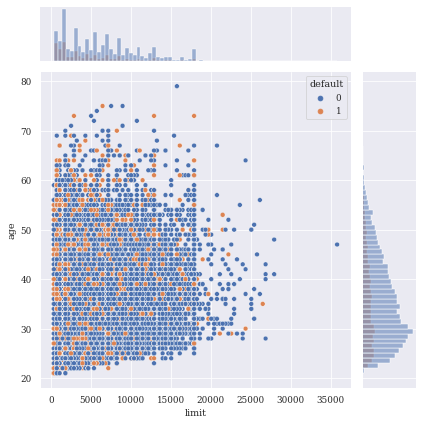

In [45]:
sns.set_theme(style="darkgrid", font='serif', context='paper')
g = sns.JointGrid(data=tr, x="limit", y="age", hue='default')
g.plot(sns.scatterplot, sns.histplot)

# <a id='7'>Feature Engineering</a>

In [60]:
tr.head()

limit  gender  education  marriage  age  behind1  behind2  behind3  \
0  1789.97       2          2         1   44        0        0        0   
1  5727.92       2          3         1   46       -1       -1       -1   
2  3579.95       2          2         1   47       -1       -1       -1   
3  6085.91       2          2         1   29        0        0        0   
4  5369.92       2          1         2   33       -2       -2       -2   

   behind4  behind5  behind6  billed1  billed2  billed3  billed4  billed5  \
0        0        0        0  1631.67  1500.21  1278.15   800.48   846.98   
1        0       -1       -1   891.55    83.70   173.84   147.74   143.02   
2       -1       -1       -2   238.64   238.64     0.00   224.46   -14.18   
3        0        0        0  2831.42  2240.15  2266.72  2287.69  1557.46   
4       -2       -2       -2   873.26   961.11  1170.71  1197.81   995.23   

   billed6   paid1    paid2    paid3   paid4   paid5    paid6  default  
0   981.66  107.97   179.10   107.40  107.40  179.00    33.08        0  
1    30.14   83.88   173.84    35.80  143.02   30.14   941.99        0  
2   -14.18  238.64     0.00   224.46    0.00    0.00     0.00        1  
3  1575.00   80.01    89.25    92.54   60.25   68.05    75.57        0  
4    80.94  966.84  1171.18  1198.39  995.51   80.94  6066.76        0

In [49]:
data = [tr, val]

# create features for demographic variables
for d in data:
    d['age_bin'] = 0
    d.loc[((d['age'] > 20) & (d['age'] < 30)) , 'age_bin'] = 1
    d.loc[((d['age'] >= 30) & (d['age'] < 60)) , 'age_bin'] = 2
    d.loc[((d['age'] >= 60) & (d['age'] < 81)) , 'age_bin'] = 3

# feature for credit use percentage: fraction of estimated available balance based on what is billed per month
# (credit limit - monthly billed amount) / credit limit
for d in data:
    d['avail6'] = (d.limit - d.billed6) / d.limit
    d['avail5'] = (d.limit - d.billed5) / d.limit
    d['avail4'] = (d.limit - d.billed4) / d.limit
    d['avail3'] = (d.limit - d.billed3) / d.limit
    d['avail2'] = (d.limit - d.billed2) / d.limit
    d['avail1'] = (d.limit - d.billed1) / d.limit
    d['avg_av'] = (d.avail1 + d.avail2 + d.avail3 + d.avail4 + d.avail5 + d.avail6) / 6

# create a feature that indicates whether a client has had a delayed payment or not
def delayed_payment(d):
    if (d.behind1 > 0) or (d.behind2 > 0) or (d.behind3 > 0) or (d.behind4 > 0) or (d.behind5 > 0) or (d.behind6 > 0):
        return 1
    else:
        return 0
for d in data:
    d['delayed'] = d.apply(delayed_payment, axis=1)

# create feature for the total number of months with delayed payment status for a particular client
def total_months_with_delayed_payments(d):
    count = 0
    if (d.behind1 > 0):
        count += 1
    if (d.behind2 > 0):
        count += 1
    if (d.behind3 > 0):
        count += 1
    if (d.behind4 > 0):
        count += 1
    if (d.behind5 > 0):
        count += 1
    if (d.behind6 > 0):
        count += 1
    return count
for d in data:
    d['latemths'] = d.apply(total_months_with_delayed_payments, axis=1)

# the ratio of amount paid and amount billed
for d in data:
    d['pperb1'] = d.paid1 / d.billed2
    d['pperb2'] = d.paid2 / d.billed3
    d['pperb3'] = d.paid3 / d.billed4
    d['pperb4'] = d.paid4 / d.billed5
    d['pperb5'] = d.paid5 / d.billed6

# remove any infinity and NaN values
datasets = ['pperb1', 'pperb2', 'pperb3', 'pperb4', 'pperb5']
for data in datasets:
    tr.replace({data: {np.inf: 0, np.nan: 0}}, inplace=True)
    val.replace({data: {np.inf: 0, np.nan: 0}}, inplace=True)


In [50]:
tr.head()

limit  gender  education  marriage  age  behind1  behind2  behind3  \
0  1791.02       2          2         1   44        0        0        0   
1  5731.27       2          3         1   46       -1       -1       -1   
2  3582.05       2          2         1   47       -1       -1       -1   
3  6089.48       2          2         1   29        0        0        0   
4  5373.07       2          1         2   33       -2       -2       -2   

   behind4  behind5  behind6  billed1  billed2  billed3  billed4  billed5  \
0        0        0        0  1632.63  1501.09  1278.90   800.95   847.48   
1        0       -1       -1   892.07    83.75   173.94   147.83   143.10   
2       -1       -1       -2   238.78   238.78     0.00   224.59   -14.18   
3        0        0        0  2833.08  2241.47  2268.04  2289.04  1558.37   
4       -2       -2       -2   873.77   961.67  1171.40  1198.52   995.81   

   billed6   paid1    paid2    paid3   paid4   paid5    paid6  default  \
0   982.23  108.03   179.21   107.46  107.46  179.10    33.10        0   
1    30.16   83.93   173.94    35.82  143.10   30.16   942.54        0   
2   -14.18  238.78     0.00   224.59    0.00    0.00     0.00        1   
3  1575.92   80.06    89.30    92.60   60.29   68.09    75.62        0   
4    80.99  967.40  1171.87  1199.09  996.10   80.99  6070.32        0   

   age_bin    avail6    avail5    avail4    avail3    avail2    avail1  \
0        2  0.451581  0.526817  0.552797  0.285938  0.161880  0.088436   
1        2  0.994738  0.975032  0.974206  0.969651  0.985387  0.844350   
2        2  1.003959  1.003959  0.937301  1.000000  0.933340  0.933340   
3        1  0.741206  0.744088  0.624099  0.627548  0.631911  0.534758   
4        2  0.984927  0.814666  0.776939  0.781987  0.821020  0.837380   

     avg_av  delayed  latemths    pperb1    pperb2    pperb3    pperb4  \
0  0.344575        0         0  0.071968  0.140128  0.134166  0.126799   
1  0.957227        0         0  1.002149  1.000000  0.242305  1.000000   
2  0.968650        0         0  1.000000  0.000000  1.000000 -0.000000   
3  0.650602        0         0  0.035718  0.039373  0.040454  0.038688   
4  0.836153        0         0  1.005958  1.000401  1.000476  1.000291   

     pperb5  
0  0.182340  
1  1.000000  
2 -0.000000  
3  0.043207  
4  1.000000

In [52]:
# plt.style.use("fivethirtyeight")
# sns.set_theme(style="darkgrid", font='serif', context='paper')
# plt.figure(figsize = (20,16))
# plt.title('Pearson Correlation of Features', y = 1.05, size = 20)
# g = sns.heatmap(tr.corr(), cmap='RdBu', square=True, linecolor='white', linewidths=0.2)
# # plt.savefig("../images/correlation_matrix_2.png")


<img src="../images/correlation_matrix_2.png">

In [65]:
tr.head()

limit  gender  education  marriage  age  behind1  behind2  behind3  \
0  1789.97       2          2         1   44        0        0        0   
1  5727.92       2          3         1   46       -1       -1       -1   
2  3579.95       2          2         1   47       -1       -1       -1   
3  6085.91       2          2         1   29        0        0        0   
4  5369.92       2          1         2   33       -2       -2       -2   

   behind4  behind5  behind6  billed1  billed2  billed3  billed4  billed5  \
0        0        0        0  1631.67  1500.21  1278.15   800.48   846.98   
1        0       -1       -1   891.55    83.70   173.84   147.74   143.02   
2       -1       -1       -2   238.64   238.64     0.00   224.46   -14.18   
3        0        0        0  2831.42  2240.15  2266.72  2287.69  1557.46   
4       -2       -2       -2   873.26   961.11  1170.71  1197.81   995.23   

   billed6   paid1    paid2    paid3   paid4   paid5    paid6  default  \
0   981.66  107.97   179.10   107.40  107.40  179.00    33.08        0   
1    30.14   83.88   173.84    35.80  143.02   30.14   941.99        0   
2   -14.18  238.64     0.00   224.46    0.00    0.00     0.00        1   
3  1575.00   80.01    89.25    92.54   60.25   68.05    75.57        0   
4    80.94  966.84  1171.18  1198.39  995.51   80.94  6066.76        0   

   age_bin    avail6    avail5    avail4    avail3    avail2    avail1  \
0        2  0.451577  0.526819  0.552797  0.285938  0.161880  0.088437   
1        2  0.994738  0.975031  0.974207  0.969650  0.985387  0.844350   
2        2  1.003961  1.003961  0.937301  1.000000  0.933340  0.933340   
3        1  0.741206  0.744088  0.624101  0.627546  0.631912  0.534758   
4        2  0.984927  0.814666  0.776941  0.781987  0.821020  0.837379   

     avg_av  delayed  latemths    pperb1    pperb2    pperb3    pperb4  \
0  0.344575        0         0  0.071970  0.140124  0.134169  0.126803   
1  0.957227        0         0  1.002151  1.000000  0.242318  1.000000   
2  0.968650        0         0  1.000000  0.000000  1.000000 -0.000000   
3  0.650602        0         0  0.035716  0.039374  0.040451  0.038685   
4  0.836153        0         0  1.005962  1.000401  1.000484  1.000281   

     pperb5  
0  0.182344  
1  1.000000  
2 -0.000000  
3  0.043206  
4  1.000000

In [69]:
pickle_out = open("../data/pickles/training_features.pickle","wb")
pickle.dump(tr, pickle_out)
pickle_out.close()

In [70]:
pickle_out = open("../data/pickles/validate_features.pickle","wb")
pickle.dump(val, pickle_out)
pickle_out.close()

# <a id='7'>Post-Feature Selection</a>

In [82]:
tr.head()

limit  gender  education  marriage  age  behind1  behind2  behind3  \
0  1790.26       2          2         1   44        0        0        0   
1  5728.83       2          3         1   46       -1       -1       -1   
2  3580.52       2          2         1   47       -1       -1       -1   
3  6086.88       2          2         1   29        0        0        0   
4  5370.78       2          1         2   33       -2       -2       -2   

   behind4  behind5  behind6  billed1  billed2  billed3  billed4  billed5  \
0        0        0        0  1631.93  1500.45  1278.35   800.60   847.12   
1        0       -1       -1   891.69    83.71   173.87   147.77   143.04   
2       -1       -1       -2   238.68   238.68     0.00   224.50   -14.18   
3        0        0        0  2831.87  2240.51  2267.08  2288.06  1557.71   
4       -2       -2       -2   873.40   961.26  1170.90  1198.01   995.38   

   billed6   paid1    paid2    paid3   paid4   paid5    paid6  default  \
0   981.81  107.99   179.13   107.42  107.42  179.03    33.08        0   
1    30.15   83.89   173.87    35.81  143.04   30.15   942.14        0   
2   -14.18  238.68     0.00   224.50    0.00    0.00     0.00        1   
3  1575.25   80.02    89.26    92.56   60.26   68.07    75.58        0   
4    80.96  966.99  1171.37  1198.58  995.67   80.96  6067.73        0   

   age_bin  gen-mar  gen-age    avail6    avail5    avail4    avail3  \
0        2        3        4  0.451582  0.526817  0.552802  0.285942   
1        2        3        4  0.994737  0.975032  0.974206  0.969650   
2        2        3        4  1.003960  1.003960  0.937300  1.000000   
3        1        3        3  0.741206  0.744087  0.624100  0.627546   
4        2        4        4  0.984926  0.814668  0.776939  0.781987   

     avail2    avail1    avg_av  delayed  latemths    pperb1    pperb2  \
0  0.161882  0.088440  0.344578        0         0  0.071972  0.140126   
1  0.985388  0.844350  0.957227        0         0  1.002150  1.000000   
2  0.933339  0.933339  0.968650        0         0  1.000000  0.000000   
3  0.631912  0.534758  0.650602        0         0  0.035715  0.039372   
4  0.821020  0.837379  0.836153        0         0  1.005961  1.000401   

     pperb3    pperb4    pperb5  
0  0.134174  0.126806  0.182347  
1  0.242336  1.000000  1.000000  
2  1.000000 -0.000000 -0.000000  
3  0.040453  0.038685  0.043212  
4  1.000476  1.000291  1.000000

In [83]:
train3 = tr[['limit', 'behind1', 'paid2', 'delayed', 'latemths', 'age', 'behind2', 'billed1', 'avg_av', 'avail1', 'default']]
validate3 = val[['limit', 'behind1', 'paid2', 'delayed', 'latemths', 'age', 'behind2', 'billed1', 'avg_av', 'avail1', 'default']]

In [84]:
train3.head()

limit  behind1    paid2  delayed  latemths  age  behind2  billed1  \
0  1790.26        0   179.13        0         0   44        0  1631.93   
1  5728.83       -1   173.87        0         0   46       -1   891.69   
2  3580.52       -1     0.00        0         0   47       -1   238.68   
3  6086.88        0    89.26        0         0   29        0  2831.87   
4  5370.78       -2  1171.37        0         0   33       -2   873.40   

     avg_av    avail1  default  
0  0.344578  0.088440        0  
1  0.957227  0.844350        0  
2  0.968650  0.933339        1  
3  0.650602  0.534758        0  
4  0.836153  0.837379        0

In [85]:
validate3.head()

limit  behind1   paid2  delayed  latemths  age  behind2  billed1  \
0  1074.16        0   71.61        0         0   25        0   317.38   
1  5370.78        0  151.64        0         0   26        0  4895.86   
2  2506.36        0  111.43        0         0   32        0  2510.73   
3  4654.68        0   64.74        0         0   49        0   740.38   
4  1790.26        0   53.71        1         1   36        0  3373.85   

     avg_av    avail1  default  
0  0.602052  0.704532        0  
1  0.293715  0.088427        0  
2  0.005217 -0.001744        0  
3  0.883482  0.840939        0  
4  0.188227 -0.884559        1

In [86]:
pickle_out = open("../data/training_model.pickle","wb")
pickle.dump(train3, pickle_out)
pickle_out.close()

In [87]:
pickle_out = open("../data/validate_model.pickle","wb")
pickle.dump(validate3, pickle_out)
pickle_out.close()